# Tidal data exploration

## Analysis of data from NOAA tidal stations

### Objectives:
- **determine max and min water levels for each station that has tidal data**
- **analyze distribution of tidal ranges across stations**
- **create buckets of stations based on their tidal ranges to inform upper and lower bounds for wave in p5.js animation**

***p5.js animation is going to be part of a web app that lets a user see tidal data and a visualization of a beach for the closest US tidal station to any given city***

---

### Import data from each station and create a scatter plot showing the range of highest highs and lowest lows for all stations

Highest high, lowest low: (154.032, -97.72200000000001)


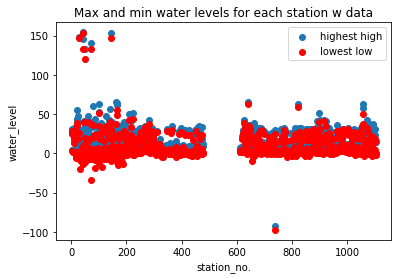

In [96]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# import all station ids from a csv that contains all ids in a single column 
all_stations_2d = pd.read_csv('../csvs/all_station_ids.csv').values.tolist()
all_stations = [i[0] for i in all_stations_2d]

# create empty lists for highest highs, lowest lows, and tidal ranges of each station
highest_highs = []
lowest_lows = []
t_ranges = []
path = "../csvs/tide_predictions/"

# counter variable and list to hold # of stations that should be included on x-axis for plots
ex = 0
exes = []

# loop through csvs containing 2020 tide projections for all stations and get data on highest highs, lowest lows, tidal ranges
for station in all_stations:
    index = all_stations.index(station)
    file_name = path + str(all_stations[index]) + "_2020.csv"
    df = pd.read_csv(file_name)
    if df.water_level.empty == False:
        max_level = max(df.water_level)
        min_level = min(df.water_level)
        highest_highs.append(max_level)
        lowest_lows.append(min_level)
        t_ranges.append(max_level - min_level)
        ex += 1
        exes.append(ex)
        
# find highest high and lowest low for all stations            
highest_high = max(highest_highs)
lowest_low = min(lowest_lows)

# find & print max and min of all water levels
max_min_water_levels = (highest_high, lowest_low)
print(f"Highest high, lowest low: {max_min_water_levels}")

# add title, labels to plot
plt.title('Max and min water levels for each station w data')
plt.xlabel('station_no.')
plt.ylabel('water_level')

# create and show a scatter plot with data on highest highs and lowest lows
highs = plt.scatter(exes, highest_highs)
lows = plt.scatter(exes, lowest_lows, c="red")
plt.legend((highs, lows), ('highest high', 'lowest low'), loc="upper right")
plt.show()

#### Findings

- approx. max, min for all stations = 150, -97
- most stations are somewhere in the middle of those extremes
- very few locations that would need dramatically different boundaries for the animation

***missing dots between 400 and 600 because of gaps in data -- not every station in list of all stations has predictions data***

---

### plot histogram of highest highs and lowest lows in 10 buckets to see rough distribution

6


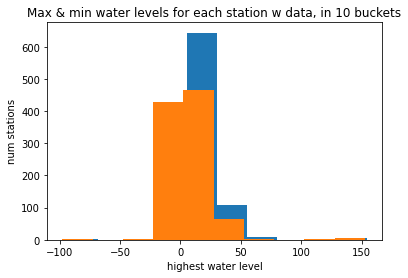

In [109]:
highs = plt.hist(highest_highs, 10)
highs = plt.hist(lowest_lows, 10)

gt_100 = len([i for i in highest_highs if i > 100])

print(gt_100)

plt.title('Max & min water levels for each station w data, in 10 buckets')
plt.xlabel('highest water level')
plt.ylabel('num stations')

plt.show()

#### Findings

- basically only 4 buckets with a meaningful number of stations

### plot histogram of tidal ranges to assess distribution further

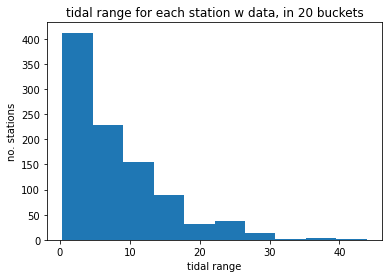

In [101]:
t_range_plt = plt.hist(t_ranges, 10)

plt.title('tidal range for each station w data, in 20 buckets')
plt.xlabel('tidal range')
plt.ylabel('no. stations')

plt.show()

## plot histogram in 4 buckets to find bounds to use for S, M, L, XL buckets

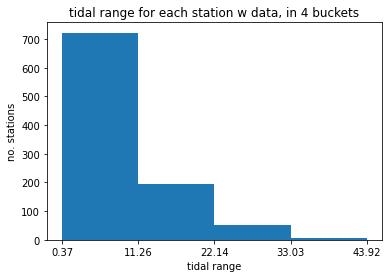

In [102]:
fig, ax = plt.subplots()

data = t_ranges

counts, bins, patches = ax.hist(data, bins = 4)

ax.set_xticks(bins)

plt.title('tidal range for each station w data, in 4 buckets')
plt.xlabel('tidal range')
plt.ylabel('no. stations')


plt.show()